In [275]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os 
import scipy.stats as sts

In [276]:
#Import your data into a Pandas DataFrame
ride_data_df = pd.read_csv(os.path.join("Resources","ride_data.csv"))
city_data_df = pd.read_csv(os.path.join("Resources", "city_data.csv"))

In [277]:
city_data_df.head(5)

city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [278]:
ride_data_df.head(5) 

city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344

In [279]:
#Merge your DataFrames.
ride_city_merged = pd.merge(ride_data_df, city_data_df , on = ["city","city"] )
ride_city_merged.head(5)



city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2019-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2019-03-09 23:45:55  19.89  2389495660448   
3  Lake Jonathanshire  2019-04-07 18:09:21  24.28  7796805191168   
4  Lake Jonathanshire  2019-01-02 14:14:50  13.89   424254840012   

   driver_count   type  
0             5  Urban  
1             5  Urban  
2             5  Urban  
3             5  Urban  
4             5  Urban

In [280]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [281]:
#Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
urban_cities_df = ride_city_merged[ride_city_merged["type"]== "Urban"]
suburban_cities_df = ride_city_merged[ride_city_merged["type"]== "Suburban"]
rural_cities_df = ride_city_merged[ride_city_merged["type"]== "Rural"]

In [282]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [283]:
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head(5)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [284]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

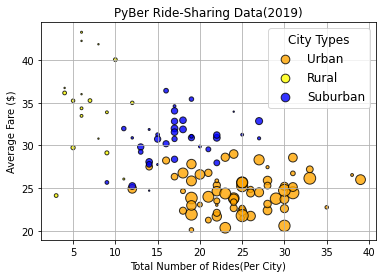

In [285]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s = urban_driv
            er_count * 2, 
            color = "orange", label = "Urban",
            edgecolor="black", linewidths=1,
            alpha=0.8)
plt.scatter(rural_ride_count, rural_avg_fare, 
            s = rural_driver_count * 2, 
            color = "Yellow", label = "Rural",
            edgecolor="black", linewidths=1,
            alpha=0.8)
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = suburban_driver_count * 2, 
            color = "Blue", label = "Suburban",
            edgecolor="black", linewidths=1,
            alpha=0.8 )
plt.grid()
plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("analysis/Fig1.png")
plt.show()

In [286]:
sts.mode(urban_fares)

ModeResult(mode=array([22.86]), count=array([5]))

In [287]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [288]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers


0        5
1        5
2        5
3        5
4        5
        ..
1620    57
1621    57
1622    57
1623    57
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [289]:
urban_fares = urban_cities_df["fare"]
urban_fares.head(5)

0    13.83
1    31.25
2    19.89
3    24.28
4    13.89
Name: fare, dtype: float64

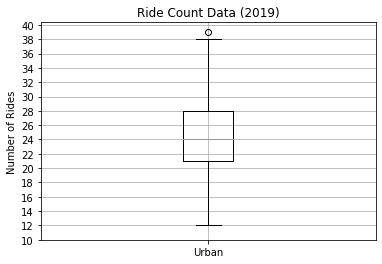

In [290]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

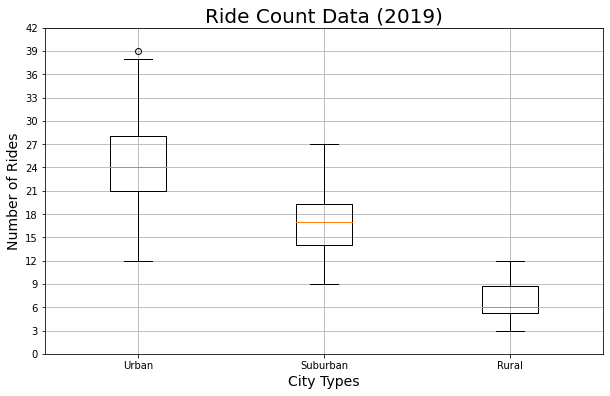

In [291]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

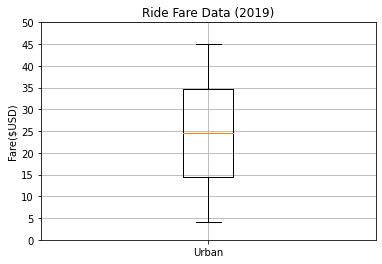

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [292]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

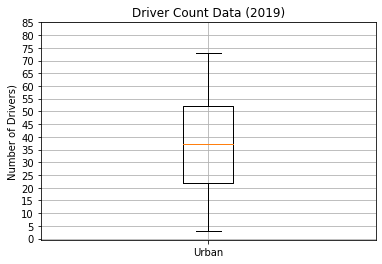

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [293]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [294]:
ride_city_merged.head(5)
fare_type_df= ride_city_merged.groupby("type")[["fare"]].sum()
total = fare_type_df.sum()["fare"]
fare_type_df["percentage"] = (fare_type_df["fare"] / total)*100
fare_type_df

fare  percentage
type                          
Rural      4327.93    6.811493
Suburban  19356.33   30.463872
Urban     39854.38   62.724635

<function matplotlib.pyplot.show(close=None, block=None)>

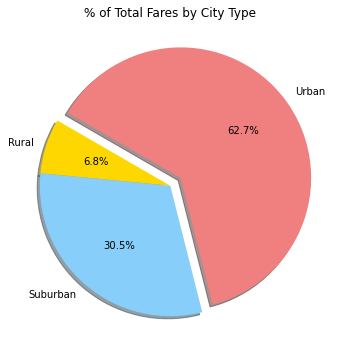

In [295]:
import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.pie(fare_type_df["percentage"],
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
plt.show

In [296]:
ride_city_merged

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2019-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2019-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2019-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2019-01-02 14:14:50  13.89   424254840012   
...                  ...                  ...    ...            ...   
2370        West Heather  2019-04-18 19:33:12  46.60  3671003215967   
2371        West Heather  2019-03-02 21:04:10  20.99  5766454453070   
2372        West Heather  2019-03-06 20:06:51  48.11  2570548892682   
2373        West Heather  2019-02-02 06:28:04  53.07  2462950442268   
2374        West Heather  2019-05-07 19:22:15  44.94  4256853490277   

      driver_count   type  
0                5  Urban  
1                5  Urban  
2                5  Urban  
3                5  Urban  
4                5  Urban  
...            ...    ...  
2370             4  Rural  
2371             4  Rural  
2372             4  Rural  
2373             4  Rural  
2374             4  Rural  

[2375 rows x 6 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

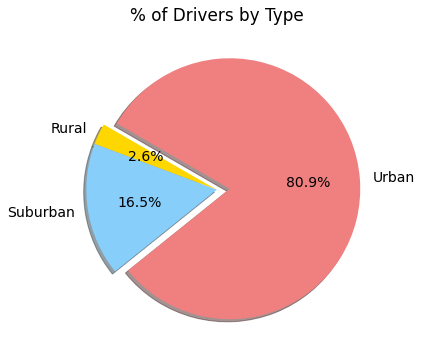

In [297]:
# Calculate the percentage of drivers for each city type.
driver_percents = (100 * city_data_df.groupby(["type"]).sum()["driver_count"] 
                   / city_data_df["driver_count"].sum())
driver_percents
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Drivers by Type")
mpl.rcParams['font.size'] = 14
plt.show

In [298]:
ride_city_merged

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2019-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2019-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2019-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2019-01-02 14:14:50  13.89   424254840012   
...                  ...                  ...    ...            ...   
2370        West Heather  2019-04-18 19:33:12  46.60  3671003215967   
2371        West Heather  2019-03-02 21:04:10  20.99  5766454453070   
2372        West Heather  2019-03-06 20:06:51  48.11  2570548892682   
2373        West Heather  2019-02-02 06:28:04  53.07  2462950442268   
2374        West Heather  2019-05-07 19:22:15  44.94  4256853490277   

      driver_count   type  
0                5  Urban  
1                5  Urban  
2                5  Urban  
3                5  Urban  
4                5  Urban  
...            ...    ...  
2370             4  Rural  
2371             4  Rural  
2372             4  Rural  
2373             4  Rural  
2374             4  Rural  

[2375 rows x 6 columns]

In [299]:
ride_city_merged.groupby("type").mean()["fare"]
ride_city_merged.groupby("type").count()["driver_count"]

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [369]:
total_drivers= city_data_df.groupby("type").sum()["driver_count"]
total_rides = ride_city_merged.groupby("type").count()["city"]
total_fares = ride_city_merged.groupby("type").sum()["fare"]
average_fare_per_ride=ride_city_merged.groupby("type").mean()["fare"]
average_fare_per_driver = total_fares/total_drivers
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [301]:
city_data_df

city  driver_count   type
0        Richardfort            38  Urban
1       Williamsstad            59  Urban
2        Port Angela            67  Urban
3         Rodneyfort            34  Urban
4        West Robert            39  Urban
..               ...           ...    ...
115     Bradshawfurt             7  Rural
116     New Ryantown             2  Rural
117   Randallchester             9  Rural
118      Jessicaport             1  Rural
119  South Saramouth             7  Rural

[120 rows x 3 columns]

In [370]:
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [303]:
ride_city_merged

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2019-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2019-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2019-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2019-01-02 14:14:50  13.89   424254840012   
...                  ...                  ...    ...            ...   
2370        West Heather  2019-04-18 19:33:12  46.60  3671003215967   
2371        West Heather  2019-03-02 21:04:10  20.99  5766454453070   
2372        West Heather  2019-03-06 20:06:51  48.11  2570548892682   
2373        West Heather  2019-02-02 06:28:04  53.07  2462950442268   
2374        West Heather  2019-05-07 19:22:15  44.94  4256853490277   

      driver_count   type  
0                5  Urban  
1                5  Urban  
2                5  Urban  
3                5  Urban  
4                5  Urban  
...            ...    ...  
2370             4  Rural  
2371             4  Rural  
2372             4  Rural  
2373             4  Rural  
2374             4  Rural  

[2375 rows x 6 columns]

driver_count    2973
dtype: int64

In [371]:
pyber_summary_df = pd.DataFrame(
{"Total Rides" : total_rides,
 "Total Drivers": total_drivers,
 "Total Fares": total_fares,
 "Average Fare Per Ride":average_fare_per_ride,
 "Average fare per Driver":average_fare_per_driver})
pyber_summary_df

Total Rides  Total Drivers  Total Fares  Average Fare Per Ride  \
type                                                                       
Rural             125             78      4327.93              34.623440   
Suburban          625            490     19356.33              30.970128   
Urban            1625           2405     39854.38              24.525772   

          Average fare per Driver  
type                               
Rural                   55.486282  
Suburban                39.502714  
Urban                   16.571468

In [306]:
pivot_data = ride_city_merged.groupby(["type","date"]).sum().reset_index()
pivot_data

type                 date   fare        ride_id  driver_count
0     Rural  2019-01-01 09:45:36  43.69  2424875833354             1
1     Rural  2019-01-02 11:18:32  52.12  3454018971635             1
2     Rural  2019-01-03 19:51:01  19.90  5559509612597             8
3     Rural  2019-01-04 03:31:26  24.88  4195619112933             8
4     Rural  2019-01-06 07:38:40  47.33  3849747342021             4
...     ...                  ...    ...            ...           ...
2370  Urban  2019-05-08 04:20:00  21.99   117997692054            52
2371  Urban  2019-05-08 04:39:49  18.45  1811574736337            11
2372  Urban  2019-05-08 07:29:01  18.55  5682021476085            33
2373  Urban  2019-05-08 11:38:35  19.77  7837163332630             4
2374  Urban  2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 5 columns]

In [307]:
pivot_data= pivot_data.pivot(index = "date", columns = "type", values = "fare")
pivot_data

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-05-08 04:20:00    NaN       NaN  21.99
2019-05-08 04:39:49    NaN       NaN  18.45
2019-05-08 07:29:01    NaN       NaN  18.55
2019-05-08 11:38:35    NaN       NaN  19.77
2019-05-08 13:10:18    NaN       NaN  18.04

[2375 rows x 3 columns]

In [308]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [309]:
pivot_data.index = pd.to_datetime(pivot_data.index)

In [312]:
test_pivot_data = pivot_data.resample("W").sum()
test_pivot_data

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29
2019-05-05  257.42   1164.78  2178.57
2019-05-12  156.82    308.21   610.03

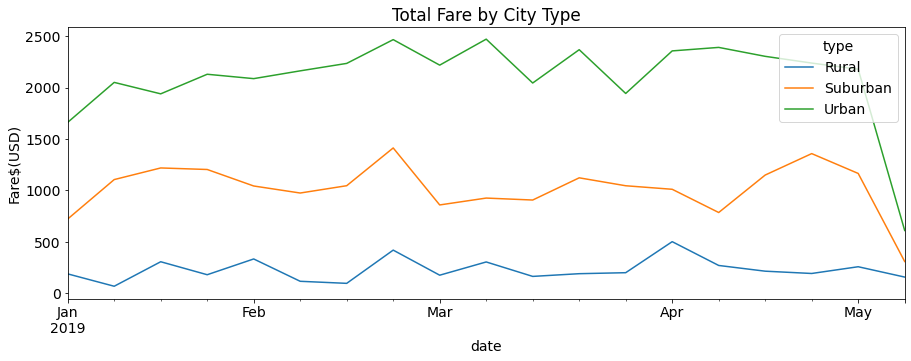

In [368]:
test_pivot_data.plot(figsize=(15,5))
plt.title("Total Fare by City Type")
plt.ylabel("Fare$(USD)")
plt.show()